# Problem 2
# Philip Carr

Use this notebook to write your code for problem 2.

In [370]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dense network

Load, preprocess, and deal with the MNIST data.

In [371]:
# load MNIST data into Keras format
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [372]:
# look at the shapes
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


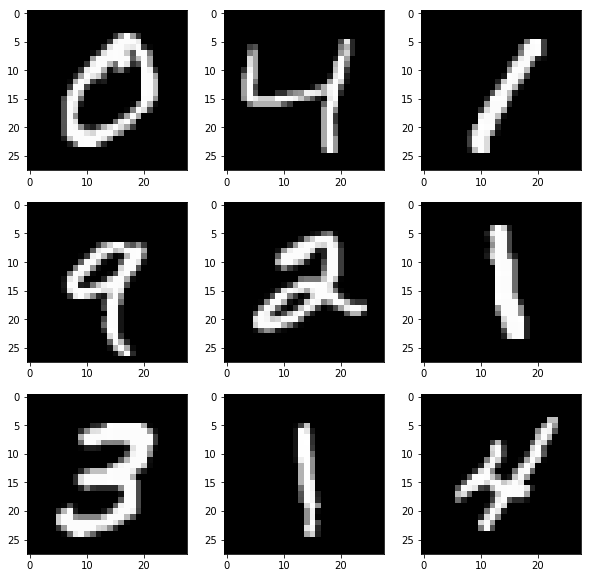

In [373]:
fig = plt.figure(figsize=(10,10))
size = 3
for i in range(1, size*size+1):
    fig.add_subplot(size, size, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

## Problem C

In [374]:
# One-hot encode the labels.
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [375]:
# Normalize the input data.
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

In [376]:
# we must reshape the X data (add a channel dimension)
x_train = np.reshape(x_train, (len(x_train), len(x_train[0])
                                             * len(x_train[0][0])))
x_test = np.reshape(x_test, (len(x_test), len(x_test[0])
                                           * len(x_test[0][0])))

In [377]:
# Shape of the training input.
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Problem D

In [378]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout

In [379]:
## Create the model here.
modelD = Sequential()
modelD.add(Dense(100))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))

In [380]:
modelD.compile(loss='categorical_crossentropy',
              optimizer='adadelta', metrics=['accuracy'])

In [381]:
fit = modelD.fit(x_train, y_train, batch_size=64, epochs=10,
    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3205 - acc: 0.9103
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1578 - acc: 0.9553
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1155 - acc: 0.9671
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0931 - acc: 0.9733
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0779 - acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0676 - acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0583 - acc: 0.9833
Epoch 8/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0514 - acc: 0.9857
Epoch 9/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0455 - acc: 0.9871
Epoch 10/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0406 - acc: 0.988

In [382]:
# Printing a summary of the layers and weights in the model.
modelD.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 100)               78500     
_________________________________________________________________
activation_234 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 10)                1010      
_________________________________________________________________
activation_235 (Activation)  (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [383]:
# Printing the accuracy of the model, according to the loss function specified in model.compile above.
score = modelD.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07948249847483821
Test accuracy: 0.9771


## Problem E

In [561]:
## Create the model here given the constraints in the problem
modelE = Sequential()

modelE.add(Dense(100))
modelE.add(Activation('relu'))
modelE.add(Dense(100))
modelE.add(Activation('relu'))
modelE.add(Dense(10))
modelE.add(Activation('softmax'))

In [562]:
modelE.compile(loss='categorical_crossentropy',
               optimizer='rmsprop', metrics=['accuracy'])

In [563]:
fit = modelE.fit(x_train, y_train, batch_size=64, epochs=20,
    verbose=1)

Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2702 - acc: 0.9215
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1182 - acc: 0.9646
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0850 - acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0663 - acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0537 - acc: 0.9833
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0454 - acc: 0.9860
Epoch 7/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0394 - acc: 0.9883
Epoch 8/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0335 - acc: 0.9899
Epoch 9/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0296 - acc: 0.9909
Epoch 10/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0243 - 

In [564]:
## Printing a summary of the layers and weights in the model.
modelE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_359 (Dense)            (None, 100)               78500     
_________________________________________________________________
activation_351 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_360 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_352 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_361 (Dense)            (None, 10)                1010      
_________________________________________________________________
activation_353 (Activation)  (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [565]:
## Printing the accuracy of the model, according to the loss function specified in model.compile above.
score = modelE.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.125881357786508
Test accuracy: 0.9801


## Problem F

In [632]:
## Create the model here given the constraints in the problem.
modelF = Sequential()
modelF.add(Dense(400))
modelF.add(Activation('relu'))
modelF.add(Dropout(0.1))
modelF.add(Dense(200))
modelF.add(Activation('relu'))
modelF.add(Dropout(0.1))
modelF.add(Dense(400))
modelF.add(Activation('relu'))
modelF.add(Dense(10))
modelF.add(Activation('softmax'))

In [633]:
modelF.compile(loss='categorical_crossentropy',
               optimizer='rmsprop', metrics=['accuracy'])

In [634]:
fit = modelF.fit(x_train, y_train, batch_size=64, epochs=20,
    verbose=1)

Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.2322 - acc: 0.9296
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1086 - acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0872 - acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0727 - acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0678 - acc: 0.9834
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0631 - acc: 0.9848
Epoch 7/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0655 - acc: 0.9848
Epoch 8/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0623 - acc: 0.9858
Epoch 9/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0585 - acc: 0.9866
Epoch 10/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0596 - 

In [635]:
## Printing a summary of the layers and weights in the model.
modelF.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_446 (Dense)            (None, 400)               314000    
_________________________________________________________________
activation_429 (Activation)  (None, 400)               0         
_________________________________________________________________
dropout_120 (Dropout)        (None, 400)               0         
_________________________________________________________________
dense_447 (Dense)            (None, 200)               80200     
_________________________________________________________________
activation_430 (Activation)  (None, 200)               0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_448 (Dense)            (None, 400)               80400     
__________

In [636]:
## Printing the accuracy of the model, according to the loss function specified in model.compile above.
score = modelF.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.13775982027360675
Test accuracy: 0.9836
